Question #4 (120 points): Implement KNN (k=2, 5 and 8) and SVM (with only RBF kernel) classification algorithms for both Iris and CIFAR-10 datasets.

Please enter the dataset you wish to visualize (cifar10, iris): cifar10
Please enter the method you wish to utilize (KNN, SVM): svm
Algorithm is being run...
Please wait...
The accuracy of the SVM algorithm with RBF kernel is 10.67
Plotting...
I'm done.


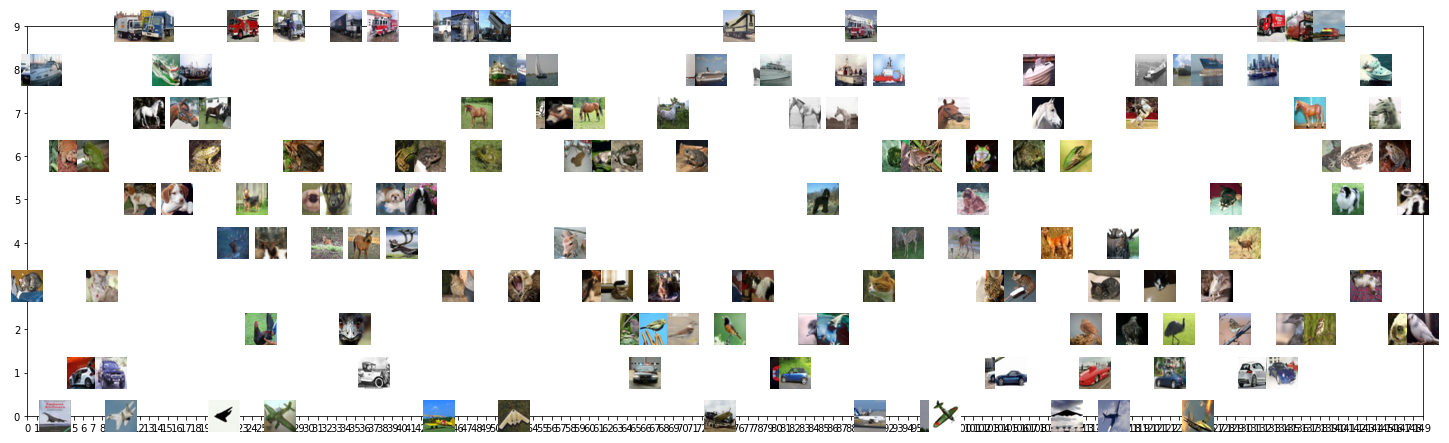

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from collections import Counter
from matplotlib.colors import ListedColormap
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from sklearn import datasets, metrics, neighbors, svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

n_neighbors_list = [2, 5, 8]
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]
direc = "cifar-10-batches-py/"
test_file = "test_batch"
filename = "data_batch_"

def unpickle(file):
    with open(file, "rb") as fo:
        dic = pickle.load(fo, encoding="bytes")
    return dic

def getCIFAR10(direc, filename, batches):
    for j in range(1, batches+1):
        file = direc + filename + str(j)
        dic = unpickle(file)
        if j == 1:
            x_train = dic[b"data"]
            y_train = dic[b"labels"]
        else:
            temp_x = dic[b"data"]
            temp_y = dic[b"labels"]
            x_train = np.concatenate((x_train, temp_x))
            y_train = np.concatenate((y_train, temp_y))
        return x_train, y_train
    
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    out = plt.contourf(xx, yy, z, **params)
    return out

def getDataIris():
    iris = datasets.load_iris()
    x = iris.data[:, :2]
    y = iris.target
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    return x, y, x_train, x_test, y_train, y_test, iris

def getDataCifar10():
    x, y = getCIFAR10(direc, filename, 5)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    data_test = unpickle(direc + test_file)
    x_test = data_test[b"data"]
    y_test = data_test[b"labels"]
    
    # Subsampling for reducing wait time
    # Adapted from https://github.com/shreyagu/kNN_CiFAR10dataset/blob/master/knn_CIFAR10.ipynb
    num_training = 3000
    mask = list(range(num_training))
    x_train = x_train[mask]
    y_train = y_train[0:num_training]
    num_test = 150
    mask = list(range(num_test))
    x_test = x_test[mask]
    y_test = y_test[0:num_test]
        
    return x_train, x_test, y_train, y_test

def plotIris(x, y, clf, iris, k):
    xx, yy = make_meshgrid(x, y)
    plot_contours(clf, xx, yy, cmap=cmap_light)
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=iris.target_names[y], palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if k is None:
        plt.title("SVC with RBF Kernel")
    else:
        plt.title("Three-Class Classification {k = %i, weights = '%s'}" % (k, knn_weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()        

def plotCifar(images, labels, method=None, weights=None, neighbors=None):
    # Adapted from https://www.tutorialspoint.com/how-to-use-a-custom-png-image-marker-in-a-plot-matplotlib
    num_test = images.shape[0]
    images = images.reshape(len(images),3,32,32).transpose(0,2,3,1)
    plt.rcParams["figure.figsize"] = [20, 6]
    plt.rcParams["figure.autolayout"] = True
    fig, ax = plt.subplots()
    x0 = 0
    for img in images[0:num_test].tolist():
        off = OffsetImage(img)
        ab = AnnotationBbox(off, (x0, labels[x0]), frameon=False)
        ax.add_artist(ab)
        x0 += 1
    plt.xticks(range(num_test))
    plt.yticks(range(10))
    filename = "cifar10"
    if method is not None:
        filename += "_" + method
    if weights is not None:
        filename += "_" + weights
    if neighbors is not None:
        filename += "_" + str(neighbors)
    filename += ".jpg"
    plt.savefig(filename)
    
def callKNN(database, knn_weights):
    if database == "iris":
        x, y, x_train, x_test, y_train, y_test, iris = getDataIris()
    elif database == "cifar10":
        x_train, x_test, y_train, y_test = getDataCifar10()
        
    for k in n_neighbors_list:
        print("Algorithm is being run...")
        print("Please wait...")
        knn = KNeighborsClassifier(n_neighbors=k, weights=knn_weights)
        knn.fit(x_train, y_train)
        print('The accuracy of the KNN algorithm with %d neighbours is {:.2f}'.format((knn.score(x_test, y_test) * 100)) % k)
        print("Plotting...")
        if database == "iris":
            plotIris(x_test, y_test, knn, iris, k)
        else:
            plotCifar(x_test, y_test, "knn", knn_weights, k)

def callSVM(database):
    if database == "iris":
        x, y, x_train, x_test, y_train, y_test, iris = getDataIris()
    elif database == "cifar10":
        x_train, x_test, y_train, y_test = getDataCifar10()

    print("Algorithm is being run...")
    print("Please wait...")
    clf = svm.SVC(kernel="rbf", gamma=0.7, C=1.0)
    clf.fit(x_train, y_train)
    print('The accuracy of the SVM algorithm with RBF kernel is {:.2f}'. format((clf.score(x_test, y_test) * 100)))
    print("Plotting...")
    if database == "iris":
        plotIris(x_test, y_test, clf, iris, None)
    else:
        plotCifar(x_test, y_test, "svm")

if __name__ == "__main__":
    db, method, knn_weights = "", "", ""
    while db not in ("cifar10", "iris"):
        db = input("Please enter the dataset you wish to visualize (cifar10, iris): ").lower()
        if db not in ("cifar10", "iris"):
            print("I'm sorry, I don't know this dataset...")
    while method not in ("KNN", "SVM"):
        method = input("Please enter the method you wish to utilize (KNN, SVM): ").upper()
        if method == "KNN":
            while knn_weights not in ("uniform", "distance"):
                knn_weights = input("Please enter the weight function you wish to visualize (uniform, distance): ").lower()
                if knn_weights not in ("uniform", "distance"):
                    print("I'm sorry, I don't know this weight function...")
            
            callKNN(db, knn_weights)
        elif method == "SVM":
            callSVM(db)
        else:
            print("I'm sorry, I don't know this method...")
    print("I'm done.")

In [5]:
from sklearn import datasets, metrics, neighbors, svm
iris = datasets.load_iris()
x = iris.data[:, :2]
y = iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')